In [137]:
#!pip install xlrd

In [138]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [139]:
# Uploading dataset
shootings = pd.read_excel("fatal-police-shootings-data.xls")
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,False,attack,NaN,False,-111.810,33.401,True
7998,8692,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,False,other,NaN,False,-119.986,37.500,True
7999,8694,NaN,2022-12-01,shot,gun,38.0,M,NaN,Tulare,CA,False,attack,NaN,False,-119.326,36.240,True
8000,8695,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,False,other,NaN,False,-95.694,39.032,True


In [140]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       8002 non-null   int64         
 1   name                     7548 non-null   object        
 2   date                     8002 non-null   datetime64[ns]
 3   manner_of_death          8002 non-null   object        
 4   armed                    7791 non-null   object        
 5   age                      7499 non-null   float64       
 6   gender                   7971 non-null   object        
 7   race                     6485 non-null   object        
 8   city                     8002 non-null   object        
 9   state                    8002 non-null   object        
 10  signs_of_mental_illness  8002 non-null   bool          
 11  threat_level             8002 non-null   object        
 12  flee                     7036 non-

In [141]:
#Removing id column from the dataframe
shootings=shootings.iloc[:,1:]
shootings

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,False,attack,NaN,False,-111.810,33.401,True
7998,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,False,other,NaN,False,-119.986,37.500,True
7999,NaN,2022-12-01,shot,gun,38.0,M,NaN,Tulare,CA,False,attack,NaN,False,-119.326,36.240,True
8000,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,False,other,NaN,False,-95.694,39.032,True


In [142]:
shootings.describe()

,age,longitude,latitude
count,7499.000000,7162.000000,7162.000000
mean,37.209228,-97.040644,36.675719
std,12.979490,16.524975,5.379965
min,2.000000,-160.007000,19.498000
25%,27.000000,-112.028250,33.480000
50%,35.000000,-94.315000,36.105000
75%,45.000000,-83.151500,40.026750
max,92.000000,-67.867000,71.301000


In [143]:
# Checking for null values in the dataframe shootings

null_values = shootings.isnull().sum()
print(null_values)

name                        454
date                          0
manner_of_death               0
armed                       211
age                         503
gender                       31
race                       1517
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        966
body_camera                   0
longitude                   840
latitude                    840
is_geocoding_exact            0
dtype: int64


In [144]:
# Duplicate rows in shootings dataframe
duplicated_rows = shootings[shootings.duplicated(keep=False)]

# Print the duplicate rows
print(duplicated_rows)

     name       date manner_of_death  armed  age gender race         city  \
7982  NaN 2022-11-25            shot  knife  NaN      M  NaN  Albuquerque   
7986  NaN 2022-11-25            shot  knife  NaN      M  NaN  Albuquerque   

     state  signs_of_mental_illness threat_level flee  body_camera  longitude  \
7982    NM                     True        other  NaN        False    -106.75   
7986    NM                     True        other  NaN        False    -106.75   

      latitude  is_geocoding_exact  
7982    35.042                True  
7986    35.042                True  


In [145]:
# Remove duplicate rows and update the DataFrame
shootings = shootings.drop_duplicates()

# Geospatial

In [146]:
#pip install geopy

Statewise Mean Imputation

In [147]:
columns_to_impute = ['latitude', 'longitude']

# Identify rows with null values in latitude or longitude
missing_values_condition = shootings['latitude'].isnull() | shootings['longitude'].isnull()

# Group by the 'state' column and fill missing values with the mean of each group
shootings['latitude'] = shootings.groupby('state')['latitude'].transform(lambda x: x.fillna(x.mean()))
shootings['longitude'] = shootings.groupby('state')['longitude'].transform(lambda x: x.fillna(x.mean()))

# Verify that the missing values have been imputed
print(shootings[['latitude', 'longitude']].isnull().sum())

latitude     0
longitude    0
dtype: int64


C:\Users\sujik\AppData\Local\Temp\ipykernel_35640\1315254979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings['latitude'] = shootings.groupby('state')['latitude'].transform(lambda x: x.fillna(x.mean()))
C:\Users\sujik\AppData\Local\Temp\ipykernel_35640\1315254979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings['longitude'] = shootings.groupby('state')['longitude'].transform(lambda x: x.fillna(x.mean()))


In [148]:
shootings['is_geocoding_exact']

0       True
1       True
2       True
3       True
4       True
        ... 
7997    True
7998    True
7999    True
8000    True
8001    True
Name: is_geocoding_exact, Length: 8001, dtype: bool

In [149]:
shootings = shootings[shootings['is_geocoding_exact'] == True]

### Geohistogram on US Map

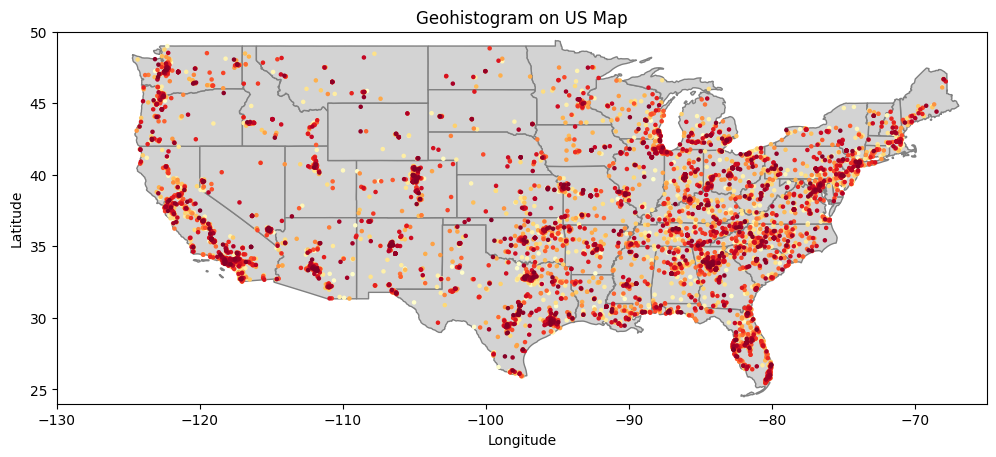

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import geopandas as gpd

# Load a shapefile of US counties for the map background
us_counties_shapefile_path = "C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/MTH 522 - Advanced Mathematical Stats/Project 2/cb_2018_us_state_20m.zip"
us_counties = gpd.read_file(us_counties_shapefile_path)

# Create a GeoDataFrame from the shootings DataFrame
geometry = [Point(xy) for xy in zip(shootings['longitude'], shootings['latitude'])]
shootings_gdf = gpd.GeoDataFrame(shootings, geometry=geometry)

# Create a map plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the US counties as a map background
us_counties.plot(ax=ax, color='lightgray', edgecolor='gray')

# Create a geohistogram-style plot
shootings_gdf.plot(ax=ax, marker='o', markersize=5, cmap='YlOrRd', legend=True)

# Set x and y axis limits
ax.set_xlim(-130, -65)
ax.set_ylim(24, 50)
plt.title('Geohistogram on US Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

# Distance Calculation between 2 locations

In [151]:
from geopy.distance import geodesic

# Coordinates for Seattle, WA
seattle_coords = (47.606, -122.332)

# Coordinates for Miami, FL
miami_coords = (45.347, -92.419)

# Calculate the geodesic distance
distance = geodesic(seattle_coords, miami_coords).miles
distance_km = geodesic(seattle_coords, miami_coords).kilometers

# Print the result in miles
print(f"The geodesic distance between Seattle, WA, and Miami, FL is {distance:.2f} miles.")
# Print the result in kilometers
print(f"The geodesic distance between Seattle, WA, and Miami, FL is {distance_km:.2f} kilometers.")

The geodesic distance between Seattle, WA, and Miami, FL is 1426.94 miles.
The geodesic distance between Seattle, WA, and Miami, FL is 2296.44 kilometers.


# Clustering based on Locations

# DBSCAN

In [152]:
from sklearn.cluster import DBSCAN

# shootings data for 'California' state
shootings_CA=shootings[shootings['state']=='CA']

# Create a GeoDataFrame from the 'shootings' DataFrame
gdf = gpd.GeoDataFrame(shootings_CA, geometry=gpd.points_from_xy(shootings_CA['longitude'], shootings_CA['latitude']))

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=50)
gdf['cluster'] = dbscan.fit_predict(gdf[['longitude', 'latitude']])

# Get unique cluster labels and their counts
cluster_counts = gdf['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster ID', 'Count']

# Print cluster details
print(cluster_counts)

   Cluster ID  Count
0           1    571
1           0    213
2          -1    162
3           2    158
4           3     39


DBSCAN does not cluster the data points appropriately. A large number of data points are classified as noise and assigned to -1 cluster. Hence we perform K-Means clustering.

# KMeans Clustering

### Elbow Curve to find the optimal number of clusters

C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

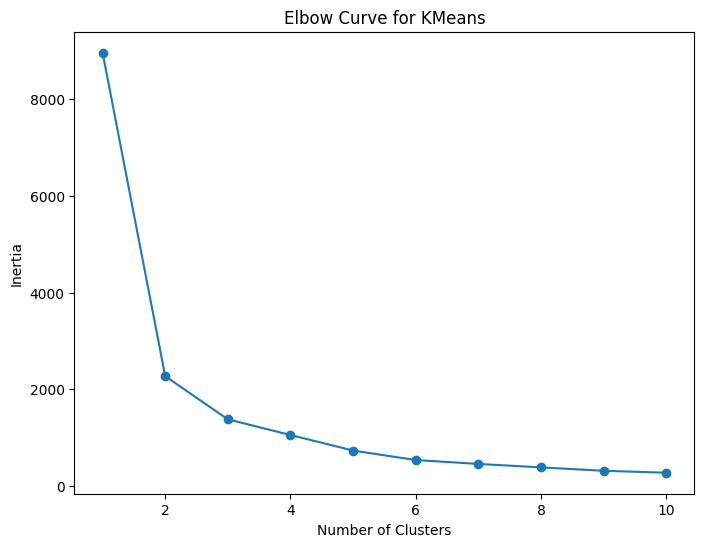

In [153]:
from sklearn.cluster import KMeans

# Create a GeoDataFrame from the 'shootings' DataFrame
gdf = gpd.GeoDataFrame(shootings_CA, geometry=gpd.points_from_xy(shootings_CA['longitude'], shootings_CA['latitude']))

# Range of cluster numbers to try
num_clusters = range(1, 11)
inertia = []

# Calculate inertia for different cluster numbers
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(gdf[['longitude', 'latitude']])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Elbow Curve for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

From the Elbow curve, 3 or 4 clusters can be chosen as the optimal number of clusters for K-Means clustering. We choose k=4.

In [154]:
# Create a GeoDataFrame from the 'shootings' DataFrame
gdf = gpd.GeoDataFrame(shootings_CA, geometry=gpd.points_from_xy(shootings_CA['longitude'], shootings_CA['latitude']))

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
gdf['cluster'] = kmeans.fit_predict(gdf[['longitude', 'latitude']])

# Get unique cluster labels and their counts
cluster_counts = gdf['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster ID', 'Count']

# Print cluster details
print(cluster_counts)

C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


   Cluster ID  Count
0           1    592
1           3    269
2           2    231
3           0     51


C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


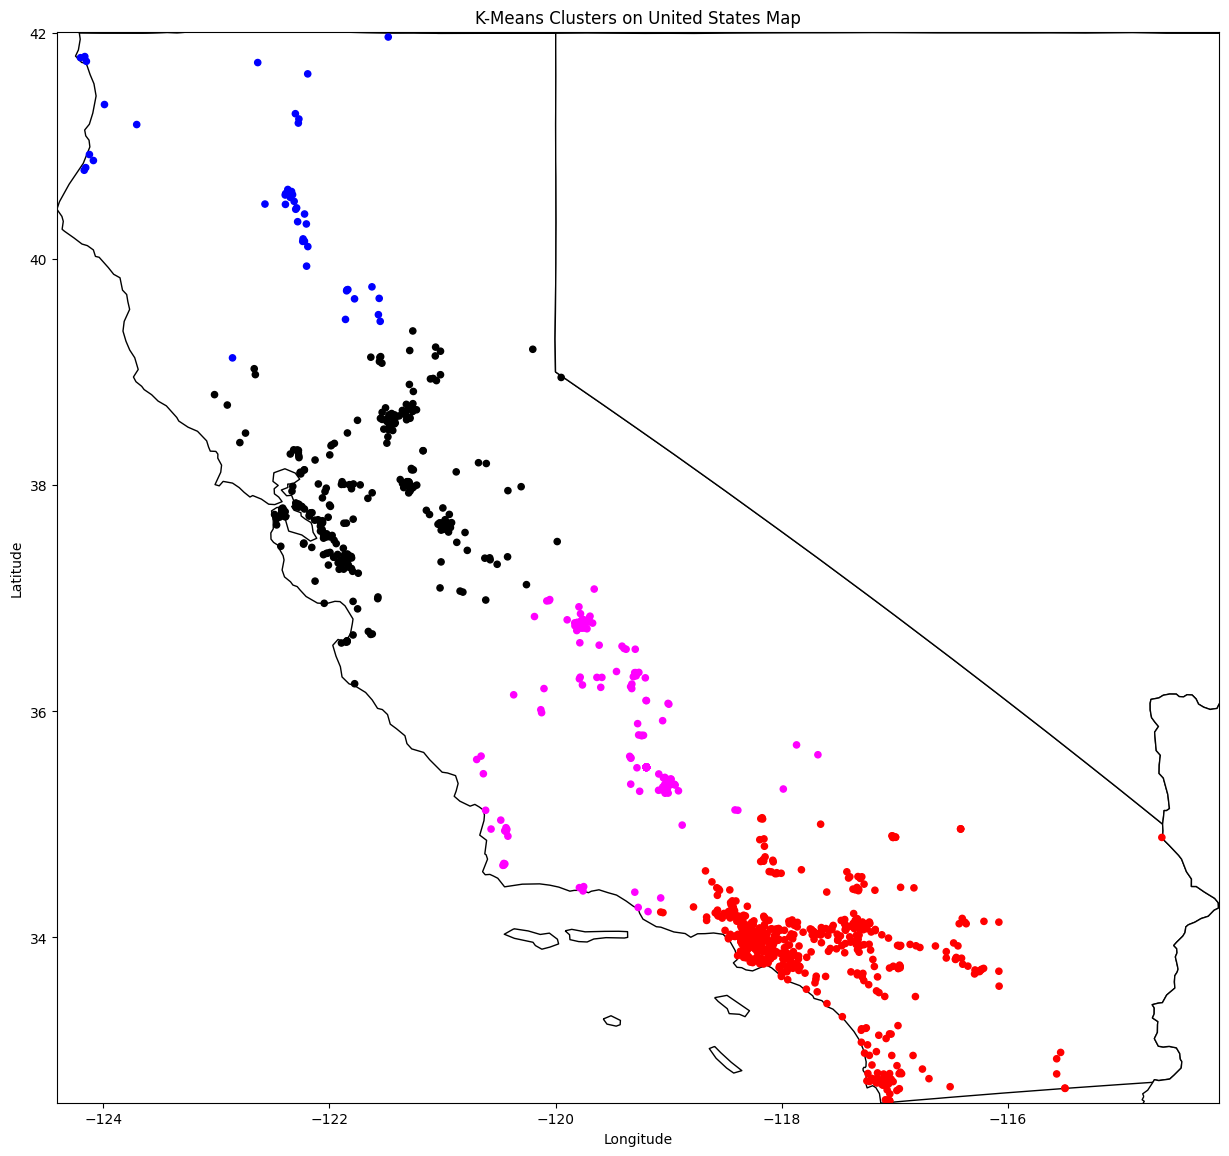

In [155]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a GeoDataFrame from the 'shootings' DataFrame
gdf = gpd.GeoDataFrame(shootings_CA, geometry=gpd.points_from_xy(shootings_CA['longitude'], shootings_CA['latitude']))

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)  # Adjust the number of clusters as needed
gdf['cluster'] = kmeans.fit_predict(gdf[['longitude', 'latitude']])

# Define custom cluster colors
cluster_colors = {0: 'blue', 1: 'red', 2: 'black', 3: 'magenta'}

# Load a United States shapefile for mapping
us_map = gpd.read_file("C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/MTH 522 - Advanced Mathematical Stats/Project 2/cb_2018_us_state_20m.zip")  # Replace with the path to your shapefile

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the United States map
us_map.plot(ax=ax, color='white', edgecolor='black')

# Create a custom colormap based on cluster_colors
cmap = np.array([cluster_colors[i] for i in gdf['cluster']])

# Plot the k-means clusters with custom colors on top of the map
gdf.plot(ax=ax, markersize=20, color=cmap)

# Set x and y axis limits
ax.set_xlim(-124.409591, -114.131211)
ax.set_ylim(32.538329, 42.009519)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('K-Means Clusters on United States Map')

# Display the plot
plt.show()

# Clustering based on Age

# KMeans Clustering

In [157]:
# Mean imputation for missing values of 'age' variable
from sklearn.impute import SimpleImputer

# Replace missing values in 'age' column with the mean age
imputer = SimpleImputer(strategy='mean')
# column to be imputed = 'age'
columns_to_impute = ['age']

# Fit and transform the imputer to replace missing values with the mean age
shootings[columns_to_impute] = imputer.fit_transform(shootings[columns_to_impute])

In [158]:
from sklearn.cluster import KMeans

# Create a DataFrame with just the 'age' variable
age_data = shootings[['age']]

# Perform KMeans clustering with a specified number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the KMeans model and assign clusters
age_data['cluster'] = kmeans.fit_predict(age_data)

# Get unique cluster labels and their counts
cluster_counts = age_data['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster ID', 'Count']

# Print cluster details
print(cluster_counts)

C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Cluster ID  Count
0           3   3095
1           0   2618
2           1   1574
3           2    696


C:\Users\sujik\AppData\Local\Temp\ipykernel_35640\152256830.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['cluster'] = kmeans.fit_predict(age_data)


In [159]:
from sklearn.cluster import KMeans

# Create a DataFrame with just the 'age' variable
age_data = shootings[['age']]

# Perform KMeans clustering with a specified number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the KMeans model and assign clusters
age_data['cluster'] = kmeans.fit_predict(age_data)

# Print cluster details
for cluster_id in age_data['cluster'].unique():
    cluster = age_data[age_data['cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster['age'])

C:\Users\sujik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
0       53.0
1       47.0
9       47.0
18      49.0
25      43.0
        ... 
7932    44.0
7958    49.0
7966    48.0
7972    51.0
7985    46.0
Name: age, Length: 1574, dtype: float64
Cluster 0:
2       23.0
5       18.0
6       22.0
10      25.0
13      30.0
        ... 
7979    30.0
7981    28.0
7987    30.0
7989    29.0
7993    23.0
Name: age, Length: 2618, dtype: float64
Cluster 3:
3       32.000000
4       39.000000
7       35.000000
8       34.000000
11      31.000000
          ...    
7997    37.208367
7998    37.208367
7999    38.000000
8000    37.208367
8001    37.208367
Name: age, Length: 3095, dtype: float64
Cluster 2:
19      71.0
29      75.0
30      68.0
43      67.0
54      61.0
        ... 
7944    64.0
7948    61.0
7968    65.0
7984    58.0
7990    63.0
Name: age, Length: 696, dtype: float64


C:\Users\sujik\AppData\Local\Temp\ipykernel_35640\4109174698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['cluster'] = kmeans.fit_predict(age_data)


In [160]:
# Group the data by 'cluster' and find the max and min age within each cluster
cluster_max_age = age_data.groupby('cluster')['age'].max()
cluster_min_age = age_data.groupby('cluster')['age'].min()

# Calculate the counts for each cluster
cluster_counts = age_data.groupby('cluster').size()

# Print the results
for cluster_id, max_age, min_age, count in zip(cluster_max_age.index, cluster_max_age, cluster_min_age, cluster_counts):
    print(f"Cluster {cluster_id}:")
    print(f"Max Age: {max_age}")
    print(f"Min Age: {min_age}")
    print(f"Count: {count}")
    print()

Cluster 0:
Max Age: 30.0
Min Age: 2.0
Count: 2618

Cluster 1:
Max Age: 56.0
Min Age: 43.0
Count: 1574

Cluster 2:
Max Age: 92.0
Min Age: 57.0
Count: 696

Cluster 3:
Max Age: 42.0
Min Age: 31.0
Count: 3095



From the above clusters, it appears that the cluster with the minimum age of 2 and the maximum age of 30 (Cluster 0) and the cluster with the minimum age of 31 and the maximum age of 42 (Cluster 3) have the highest count of individuals who were shot. This suggests that a significant number of individuals shot by the police belong to the age range of 2 to 43.

# Age Distribution Analysis for people killed by police

In [161]:
# Uploading dataset
shootings = pd.read_excel("fatal-police-shootings-data.xls")
shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,False,attack,NaN,False,-111.810,33.401,True
7998,8692,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,False,other,NaN,False,-119.986,37.500,True
7999,8694,NaN,2022-12-01,shot,gun,38.0,M,NaN,Tulare,CA,False,attack,NaN,False,-119.326,36.240,True
8000,8695,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,False,other,NaN,False,-95.694,39.032,True


In [162]:
# Select only 'age', 'gender', and 'race' columns from the 'shootings' DataFrame
shootings_age_gender_race = shootings[['age', 'gender', 'race']]
shootings_age_gender_race.dropna(subset=['gender', 'race'], inplace=True)

C:\Users\sujik\AppData\Local\Temp\ipykernel_35640\600159219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_age_gender_race.dropna(subset=['gender', 'race'], inplace=True)


In [163]:
# Mean imputation for missing values of 'age' variable
from sklearn.impute import SimpleImputer

# Replace missing values in 'age' column with the mean age
imputer = SimpleImputer(strategy='mean')
# column to be imputed = 'age'
columns_to_impute = ['age']

# Fit and transform the imputer to replace missing values with the mean age
shootings_age_gender_race[columns_to_impute] = imputer.fit_transform(shootings_age_gender_race[columns_to_impute])

C:\Users\sujik\AppData\Local\Temp\ipykernel_35640\5675684.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_age_gender_race[columns_to_impute] = imputer.fit_transform(shootings_age_gender_race[columns_to_impute])


Kurtosis:  0.24795579286832448
Skewness:  0.7233380058309867


count    6482.000000
mean       36.778793
std        12.532811
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

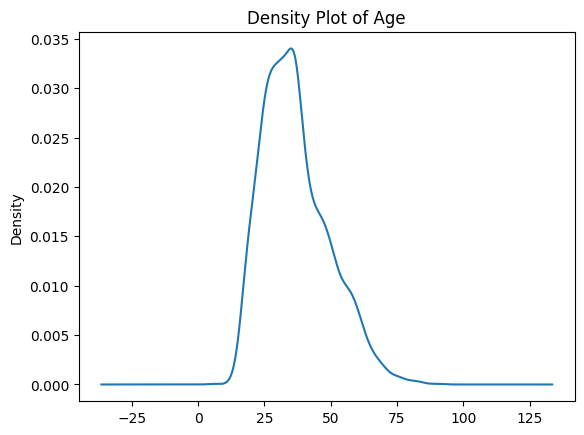

In [164]:
# Creating a kernel density plot for the 'age' column, calculating kurtosis, skewness, and displaying descriptive statistics
shootings_age_gender_race['age'].plot(kind = 'kde')
plt.title('Density Plot of Age')
kurt=shootings_age_gender_race['age'].kurtosis()
print('Kurtosis: ',kurt)
skew=shootings_age_gender_race['age'].skew()
print('Skewness: ',skew)
shootings_age_gender_race['age'].describe()

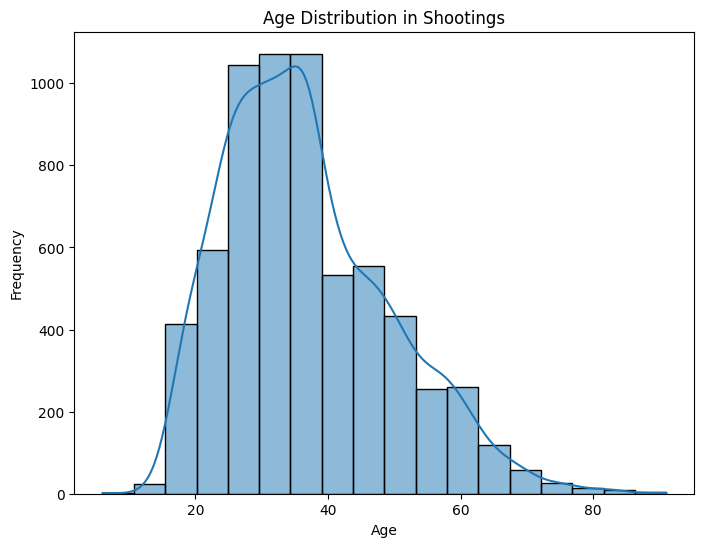

In [165]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(shootings_age_gender_race.age, kde=True, bins=18)
plt.title('Age Distribution in Shootings')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

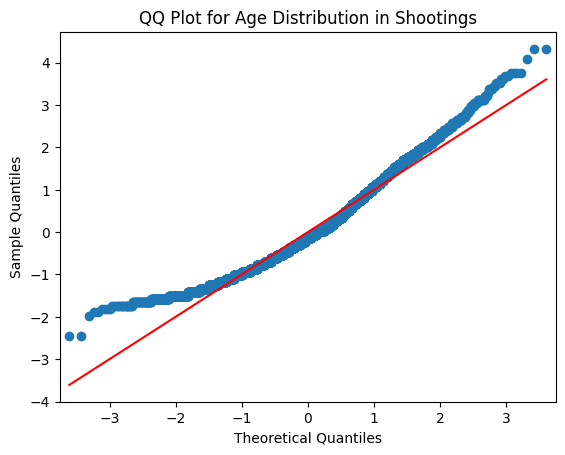

In [166]:
# Create a QQ plot
import statsmodels.api as sm
import scipy.stats as stats

plt.figure(figsize=(8, 6))
sm.qqplot(shootings_age_gender_race.age, line='s', dist=stats.norm, fit=True)
plt.title('QQ Plot for Age Distribution in Shootings')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

In [167]:
# To determine what percentage of the right tail of the age distribution lies more than 2 standard deviations from the mean
import numpy as np
from scipy.stats import norm

# Calculate mean and SD of 'age' variable
mean_age = np.mean(shootings_age_gender_race.age)
std_dev_age = np.std(shootings_age_gender_race.age)

# Calculate the threshold
threshold = mean_age + 2 * std_dev_age

percentage_above_threshold = (np.sum(shootings_age_gender_race.age > threshold) / len(shootings_age_gender_race.age)) * 100

# Calculate the percentage of the right tail
percentage_right_tail = 100 * (1 - norm.cdf(threshold, loc=mean_age, scale=std_dev_age))

print(f"Threshold is: {threshold:.4f}%")
print(f"The percentage of values greater than 2 standard deviations above the mean: {percentage_above_threshold:.4f}%")
print(f"The percentage in the right tail beyond 2 standard deviations for standard normal distribution is: {percentage_right_tail:.4f}%")

Threshold is: 61.8425%
The percentage of values greater than 2 standard deviations above the mean: 4.1500%
The percentage in the right tail beyond 2 standard deviations for standard normal distribution is: 2.2750%


This is somewhat greater than what we get for a standard normal distribution.

In [168]:
# number of cases, and what percentage of total cases of ages lie between-1 and 1 standard deviation from the #mean,
#and compare this with the corresponding percentage for a standard normal distribution
import numpy as np
from scipy.stats import norm

# Calculate mean and SD of 'age' variable
mean_age = np.mean(shootings_age_gender_race.age)
std_dev_age = np.std(shootings_age_gender_race.age)

# Calculate the lower and upper bounds for -1 and 1 standard deviation from the mean
lower_bound = mean_age - std_dev_age
upper_bound = mean_age + std_dev_age

# Calculate the number of cases within the specified range
cases_within_range = np.sum((shootings_age_gender_race.age >= lower_bound) & (shootings_age_gender_race.age <= upper_bound))

# Calculate the percentage of cases within the specified range
percentage_within_range = (cases_within_range / len(shootings.age)) * 100

print(f"Number of cases within -1 to 1 standard deviation from the mean: {cases_within_range}")
print(f"Percentage of cases within -1 to 1 standard deviation from the mean: {percentage_within_range:.4f}%")

# Calculate the percentage for a standard normal distribution within the same range
percentage_normal_distribution = 100 * (norm.cdf(1) - norm.cdf(-1))

print(f"Percentage for a standard normal distribution within -1 to 1 standard deviation: {percentage_normal_distribution:.4f}%")

print(f"Lower Bound: {lower_bound:.4f}%")
print(f"Upper Bound: {upper_bound:.4f}%")

Number of cases within -1 to 1 standard deviation from the mean: 4374
Percentage of cases within -1 to 1 standard deviation from the mean: 54.6613%
Percentage for a standard normal distribution within -1 to 1 standard deviation: 68.2689%
Lower Bound: 24.2469%
Upper Bound: 49.3106%


So about 1/2 (54%) of all ages of people killed by police lie between 24 and 49.

# Black and White Age Distribution Analysis

Age Distribution Analysis for Black individuals

In [169]:
# Uploading dataset
shootings = pd.read_excel("fatal-police-shootings-data.xls")
shootings
# Mean imputation for missing values of 'age' variable
from sklearn.impute import SimpleImputer

# Replace missing values in 'age' column with the mean age
imputer = SimpleImputer(strategy='mean')
# column to be imputed = 'age'
columns_to_impute = ['age']

# Fit and transform the imputer to replace missing values with the mean age
shootings[columns_to_impute] = imputer.fit_transform(shootings[columns_to_impute])

In [170]:
# Filter the DataFrame to select rows for 'White' and 'Black' races
AgesBW = shootings[shootings['race'].isin(['W', 'B'])]

# Filter for Black individuals
AgesBlack = pd.DataFrame(AgesBW[(AgesBW['race'] == 'B') & (AgesBW['age'].notna())]['age'])

# Filter for White individuals
AgesWhite = pd.DataFrame(AgesBW[(AgesBW['race'] == 'W') & (AgesBW['age'].notna())]['age'])

Kurtosis:  0.849250596745907
Skewness:  0.9451112200334272


count    1766.000000
mean       33.027508
std        11.274054
min        13.000000
25%        25.000000
50%        31.000000
75%        39.000000
max        88.000000
Name: age, dtype: float64

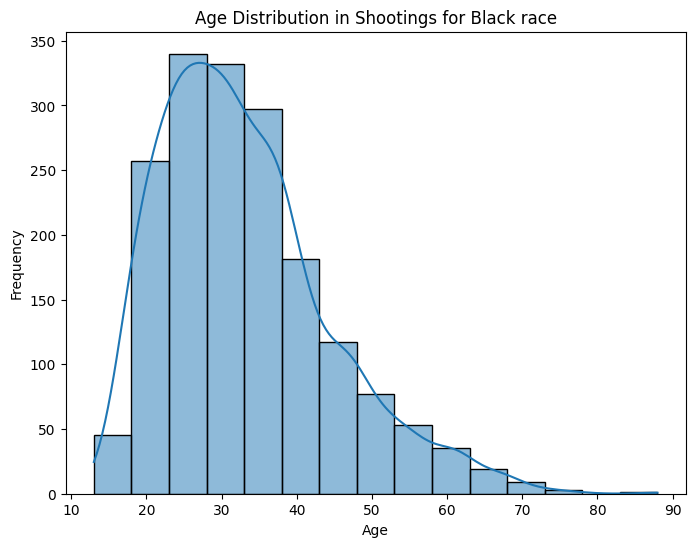

In [171]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(AgesBlack.age, kde=True, bins=15)
plt.title('Age Distribution in Shootings for Black race')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Creating a kernel density plot for the 'age' column of the 'Black' race, calculating kurtosis, skewness, and displaying descriptive statistics
kurt=AgesBlack['age'].kurtosis()
print('Kurtosis: ',kurt)
skew=AgesBlack['age'].skew()
print('Skewness: ',skew)
AgesBlack['age'].describe()

<Figure size 800x600 with 0 Axes>

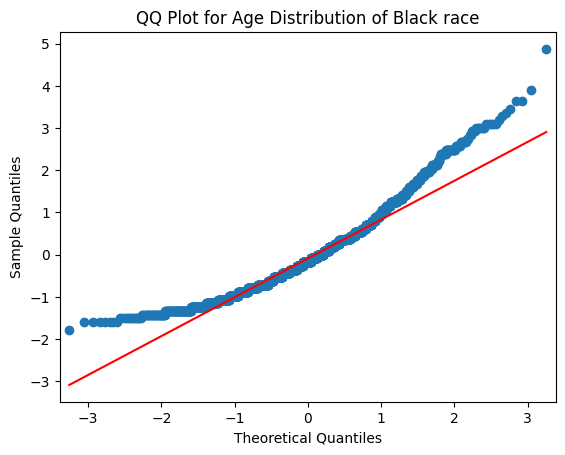

In [172]:
# Create a QQ plot for 'age' distribution of the 'Black' race
import statsmodels.api as sm
import scipy.stats as stats

plt.figure(figsize=(8, 6))
sm.qqplot(AgesBlack.age, line='q', dist=stats.norm, fit=True)
plt.title('QQ Plot for Age Distribution of Black race')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [173]:
# To determine what percentage of the right tail of the age distribution lies more than 2 standard deviations from the mean
import numpy as np
from scipy.stats import norm

# Calculate mean and SD of 'age' variable
mean_age = np.mean(AgesBlack.age)
std_dev_age = np.std(AgesBlack.age)

# Calculate the threshold
threshold = mean_age + 2 * std_dev_age

percentage_above_threshold = (np.sum(AgesBlack.age > threshold) / len(AgesBlack.age)) * 100

# Calculate the percentage of the right tail
percentage_right_tail = 100 * (1 - norm.cdf(threshold, loc=mean_age, scale=std_dev_age))

print(f"Threshold is: {threshold:.4f}%")
print(f"The percentage of values greater than 2 standard deviations above the mean: {percentage_above_threshold:.4f}%")
print(f"The percentage in the right tail beyond 2 standard deviations for standard normal distribution is: {percentage_right_tail:.4f}%")

Threshold is: 55.5692%
The percentage of values greater than 2 standard deviations above the mean: 4.8131%
The percentage in the right tail beyond 2 standard deviations for standard normal distribution is: 2.2750%


This is somewhat greater than what we get for a standard normal distribution.

In [174]:
# number of cases, and what percentage of total cases of ages lie between-1 and 1 standard deviation from the #mean,
# and compare this with the corresponding percentage for a standard normal distribution
import numpy as np
from scipy.stats import norm

# Calculate mean and SD of 'age' variable
mean_age = np.mean(AgesBlack.age)
std_dev_age = np.std(AgesBlack.age)

# Calculate the lower and upper bounds for -1 and 1 standard deviation from the mean
lower_bound = mean_age - std_dev_age
upper_bound = mean_age + std_dev_age

# Calculate the number of cases within the specified range
cases_within_range = np.sum((AgesBlack.age >= lower_bound) & (AgesBlack.age <= upper_bound))

# Calculate the percentage of cases within the specified range
percentage_within_range = (cases_within_range / len(shootings.age)) * 100

print(f"Number of cases within -1 to 1 standard deviation from the mean: {cases_within_range}")
print(f"Percentage of cases within -1 to 1 standard deviation from the mean: {percentage_within_range:.4f}%")

# Calculate the percentage for a standard normal distribution within the same range
percentage_normal_distribution = 100 * (norm.cdf(1) - norm.cdf(-1))

print(f"Percentage for a standard normal distribution within -1 to 1 standard deviation: {percentage_normal_distribution:.4f}%")

print(f"Lower Bound: {lower_bound:.4f}%")
print(f"Upper Bound: {upper_bound:.4f}%")

Number of cases within -1 to 1 standard deviation from the mean: 1240
Percentage of cases within -1 to 1 standard deviation from the mean: 15.4961%
Percentage for a standard normal distribution within -1 to 1 standard deviation: 68.2689%
Lower Bound: 21.7566%
Upper Bound: 44.2984%


So about 15% of all ages of black people killed by police lie between 21 and 44.

Age Distribution Analysis for White individuals

Kurtosis:  -0.08564596693864202
Skewness:  0.5466418491935224


count    3300.000000
mean       40.075975
std        13.055390
min         6.000000
25%        30.000000
50%        38.000000
75%        49.000000
max        91.000000
Name: age, dtype: float64

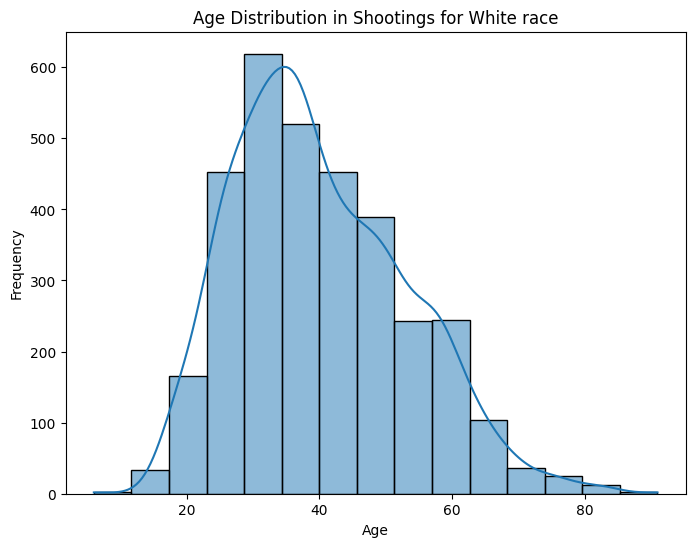

In [175]:
# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(AgesWhite.age, kde=True, bins=15)
plt.title('Age Distribution in Shootings for White race')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Creating a kernel density plot for the 'age' column of the 'White' race, calculating kurtosis, skewness, and displaying descriptive statistics
kurt=AgesWhite['age'].kurtosis()
print('Kurtosis: ',kurt)
skew=AgesWhite['age'].skew()
print('Skewness: ',skew)
AgesWhite['age'].describe()

<Figure size 800x600 with 0 Axes>

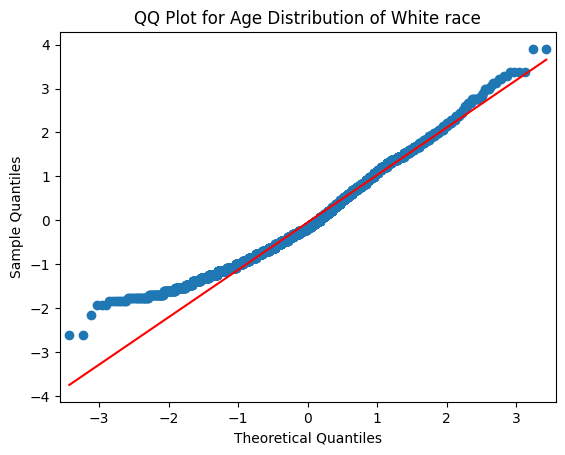

In [176]:
# Create a QQ plot for 'age' distribution of the 'White' race
import statsmodels.api as sm
import scipy.stats as stats

plt.figure(figsize=(8, 6))
sm.qqplot(AgesWhite.age, line='q', dist=stats.norm, fit=True)
plt.title('QQ Plot for Age Distribution of White race')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

In [177]:
# To determine what percentage of the right tail of the age distribution lies more than 2 standard deviations from the mean
import numpy as np
from scipy.stats import norm

# Calculate mean and SD of 'age' variable
mean_age = np.mean(AgesWhite.age)
std_dev_age = np.std(AgesWhite.age)

# Calculate the threshold
threshold = mean_age + 2 * std_dev_age

percentage_above_threshold = (np.sum(AgesWhite.age > threshold) / len(AgesWhite.age)) * 100

# Calculate the percentage of the right tail
percentage_right_tail = 100 * (1 - norm.cdf(threshold, loc=mean_age, scale=std_dev_age))

print(f"Threshold is: {threshold:.4f}%")
print(f"The percentage of values greater than 2 standard deviations above the mean: {percentage_above_threshold:.4f}%")
print(f"The percentage in the right tail beyond 2 standard deviations for standard normal distribution is: {percentage_right_tail:.4f}%")

Threshold is: 66.1828%
The percentage of values greater than 2 standard deviations above the mean: 3.0000%
The percentage in the right tail beyond 2 standard deviations for standard normal distribution is: 2.2750%


This is somewhat greater than what we get for a standard normal distribution.

In [178]:
# number of cases, and what percentage of total cases of ages lie between-1 and 1 standard deviation from the #mean,
# and compare this with the corresponding percentage for a standard normal distribution
import numpy as np
from scipy.stats import norm

# Calculate mean and SD of 'age' variable
mean_age = np.mean(AgesWhite.age)
std_dev_age = np.std(AgesWhite.age)

# Calculate the lower and upper bounds for -1 and 1 standard deviation from the mean
lower_bound = mean_age - std_dev_age
upper_bound = mean_age + std_dev_age

# Calculate the number of cases within the specified range
cases_within_range = np.sum((AgesWhite.age >= lower_bound) & (AgesWhite.age <= upper_bound))

# Calculate the percentage of cases within the specified range
percentage_within_range = (cases_within_range / len(shootings.age)) * 100

print(f"Number of cases within -1 to 1 standard deviation from the mean: {cases_within_range}")
print(f"Percentage of cases within -1 to 1 standard deviation from the mean: {percentage_within_range:.4f}%")

# Calculate the percentage for a standard normal distribution within the same range
percentage_normal_distribution = 100 * (norm.cdf(1) - norm.cdf(-1))

print(f"Percentage for a standard normal distribution within -1 to 1 standard deviation: {percentage_normal_distribution:.4f}%")

print(f"Lower Bound: {lower_bound:.4f}%")
print(f"Upper Bound: {upper_bound:.4f}%")

Number of cases within -1 to 1 standard deviation from the mean: 2160
Percentage of cases within -1 to 1 standard deviation from the mean: 26.9933%
Percentage for a standard normal distribution within -1 to 1 standard deviation: 68.2689%
Lower Bound: 27.0226%
Upper Bound: 53.1294%


So about 27% of all ages of white people killed by police lie between 27 and 53.

# Of people killed by police, are white people statistically significantly older, on average, than black people?

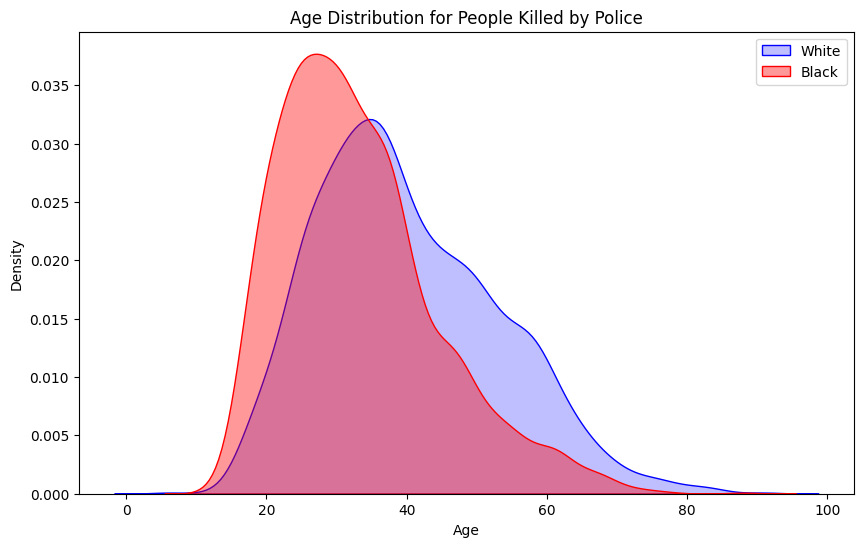

Mean of White race: 40.07597477643483
Mean of Black race: 33.027507555933845


In [179]:
# Combined Density Plot for Black and White races
plt.figure(figsize=(10, 6))

# Plot the smooth histogram for AgesWhite in gray
sns.kdeplot(data=AgesWhite['age'], color='blue', fill=True)

# Plot the smooth histogram for AgesBlack in red with reduced opacity
sns.kdeplot(data=AgesBlack['age'], color='red', fill=True, alpha=0.4)

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution for People Killed by Police")

# Show the plot
plt.legend(["White", "Black"])
plt.show()

print('Mean of White race:', AgesWhite['age'].mean())
print('Mean of Black race:', AgesBlack['age'].mean())

# two-sample t-test

In [180]:
from scipy import stats

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(AgesWhite['age'], AgesBlack['age'])

print("T-statistic:", t_statistic)
print("P-value:", p_value)
negative_log_p_value = -np.log2(p_value)

print("Negative Log (base 2) of p-value:", negative_log_p_value) 
#p-value is equivalent to the probability of tossing more than 260 tails in a row from a fair coin

T-statistic: 19.181195822899454
P-value: 3.23273827345943e-79
Negative Log (base 2) of p-value: 260.73956278630754


The age distributions of Black and White individuals who were killed by the police deviate from a normal distribution. Therefore, it may not be appropriate to use a t-test to calculate a p-value for the difference in means between these two groups. Notably, the mean age for White individuals killed by police is around 40 years, while the mean age for Black individuals is approximately 33 years.

# Monte Carlo

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Define the number of iterations (max)
max_iterations = 2 * 10**6

# Combine the Black and White age data
pooled_ages = np.concatenate((AgesBlack['age'], AgesWhite['age']))

# Calculate the total age and lengths of Black and White datasets
total_age = np.sum(pooled_ages)
length_white = len(AgesWhite)
length_black = len(AgesBlack)

# Initialize an empty list to store differences
differences = []

# Run the Monte Carlo simulation
for n in range(max_iterations):
    sample = np.random.choice(pooled_ages, length_white, replace=False)
    sample_mean_a = np.mean(sample)
    sample_mean_b = (total_age - np.sum(sample)) / length_black
    differences.append(sample_mean_a - sample_mean_b)

# Calculate the mean age difference
mean_age_difference = np.mean(AgesWhite['age']) - np.mean(AgesBlack['age'])

Mean age difference for White and Black people = 7.048467220500989
Number of samples with mean difference > 7.048467220500989 = 0


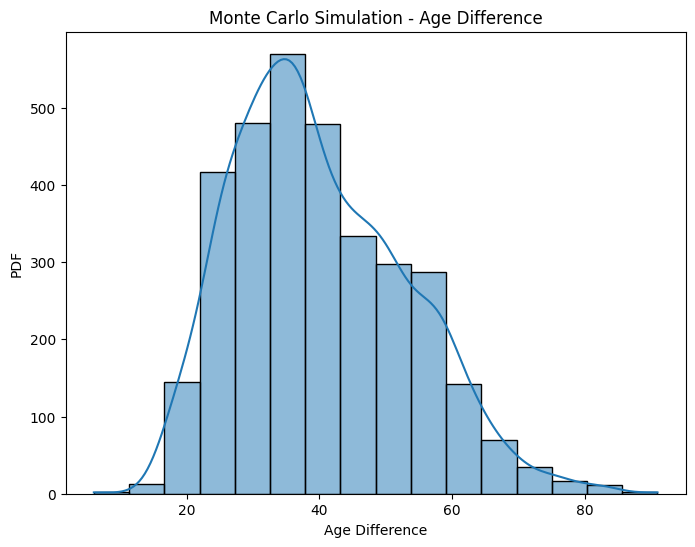

In [182]:
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(AgesWhite.age, kde=True, bins=16)
plt.xlabel("Age Difference")
plt.ylabel("PDF")
plt.title("Monte Carlo Simulation - Age Difference")

# Print the mean age difference and the number of samples with a mean difference greater than the calculated mean
print("Mean age difference for White and Black people =", mean_age_difference)
num_samples_greater_than_mean = len([x for x in differences if x > mean_age_difference])
print(f"Number of samples with mean difference > {mean_age_difference} = {num_samples_greater_than_mean}")

# Show the plot
plt.show()

For 2,000,000 random samples, each of the same size as the Black and White age lists, drawn from the combined age distributions of Black and White individuals, none of these samples yielded a difference in means greater than the observed 7~ year difference in mean age between White and Black individuals. This result, consistent with the findings of the t-test, strongly indicates a very low probability of observing a 7~ year difference in mean age for White individuals compared to Black individuals if the null hypothesis of no difference were correct.

# Effect Size

To estimate how much of an effect is the 7~ year average age difference

### Cohen's d

In [183]:
import numpy as np
from scipy import stats

# Calculate sample sizes and variances
n1 = len(AgesWhite)
n2 = len(AgesBlack)
v1 = np.var(AgesWhite, ddof=1)
v2 = np.var(AgesBlack, ddof=1)

# Calculate pooled standard deviation
s = np.sqrt(((n1 - 1) * v1 + (n2 - 1) * v2) / (n1 + n2 - 2))

# Calculate Cohen's d
d = (np.mean(AgesWhite) - np.mean(AgesBlack)) / s

print("Cohen's d =", d)

Cohen's d = age    0.56553
dtype: float64


C:\Users\sujik\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sujik\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In terms of the Cohen-Sawilowsky guidelines, this is a medium effect size.

### Fraction above the median

Percentage of White ages above the median Black age: 71.2121%


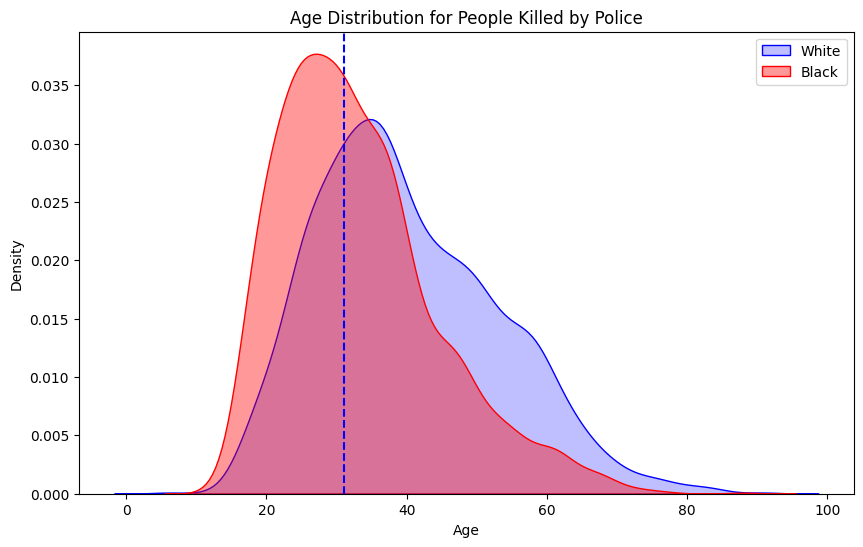

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the smooth histogram for AgesWhite
sns.kdeplot(data=AgesWhite['age'], color='blue', fill=True)

# Plot the smooth histogram for AgesBlack
sns.kdeplot(data=AgesBlack['age'], color='red', fill=True, alpha=0.4)

# Add a vertical line at the median of AgesBlack
plt.axvline(np.median(AgesBlack['age']), color='blue', linestyle='--')

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution for People Killed by Police")

# Calculate the percentage of White ages greater than the median Black age
percentage_above_median = (np.sum(AgesWhite['age'] > np.median(AgesBlack['age'])) / len(AgesWhite)) * 100

print(f"Percentage of White ages above the median Black age: {percentage_above_median:.4f}%")

# Show the plot
plt.legend(["White", "Black"])
plt.show()

If the age distributions of White and Black individuals were nearly identical, we would expect that roughly half (50%) of the data points in each dataset would be greater than their respective medians. In such a scenario, the percentage of ages above the median for White individuals would be roughly 50%.

Conversely, in an extreme situation, one entire distribution could be entirely above the median of the other, resulting in a percentage of 100%.

The observed percentage of 19%, which represents the proportion of White ages above the median Black age, is approximately 38% of the entire range of possible percentages that could occur above the median for the Black age distribution. This comparison underscores the substantial nature of the observed effect size, indicating that it's a significant departure from what might be expected under conditions of minimal difference.

In conclusion, based on this analysis, the effect size appears to be of medium magnitude, signifying a meaningful distinction in the age distributions between White and Black individuals.